In [124]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
import math

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from isupgrader.data.panda_dataset import ImageTransform, PANDADataset
from pytorch_lightning import seed_everything
import numpy as np

%matplotlib inline


In [126]:
seed = 2021
seed_everything(seed, workers=True)


Global seed set to 2021


2021

In [127]:
# Debugging
DEBUG = True

# Tiling (if live)
LEVEL=1
TILE_SIZE = 256
N_TILES = 36

In [128]:
TRAIN_IMAGES = "/data/processed/panda/train_images/"
TRAIN_SLIDES = "/data/raw/panda/train_images/"
df_train = pd.read_csv("/data/processed/panda/slides_train.csv")

if DEBUG:
    MAX_EPOCHS = 1
    DEBUG_SAMPLE_SIZE = 100

    if len(df_train) < 100:
        DEBUG_SAMPLE_SIZE = len(df_train)

    df_train = df_train.sample(DEBUG_SAMPLE_SIZE).reset_index(drop=True)


In [129]:
dataset_show = PANDADataset(df_train,
                            slide_dir=TRAIN_IMAGES,
                            n_tiles=N_TILES,
                            tile_size=TILE_SIZE,
                            transform=ImageTransform(stage="TEST", tile_size=TILE_SIZE),
                            )

dataset_show_live = PANDADataset(df_train,
                                 slide_dir=TRAIN_SLIDES,
                                 n_tiles=N_TILES,
                                 tile_size=TILE_SIZE,
                                 transform=ImageTransform(stage="TEST", tile_size=TILE_SIZE),
                                 live_tile=True,
                                 )

random_slide_idx = df_train.loc[df_train.slide_id == "00c15b23b30a5ba061358d9641118904"].index.item()



In [130]:
# %%time

img, label, slide_id = dataset_show[random_slide_idx]

In [131]:
# %%time
# img, label, slide_id = dataset_show_live[random_slide_idx]

TypeError: 'Figure' object is not callable

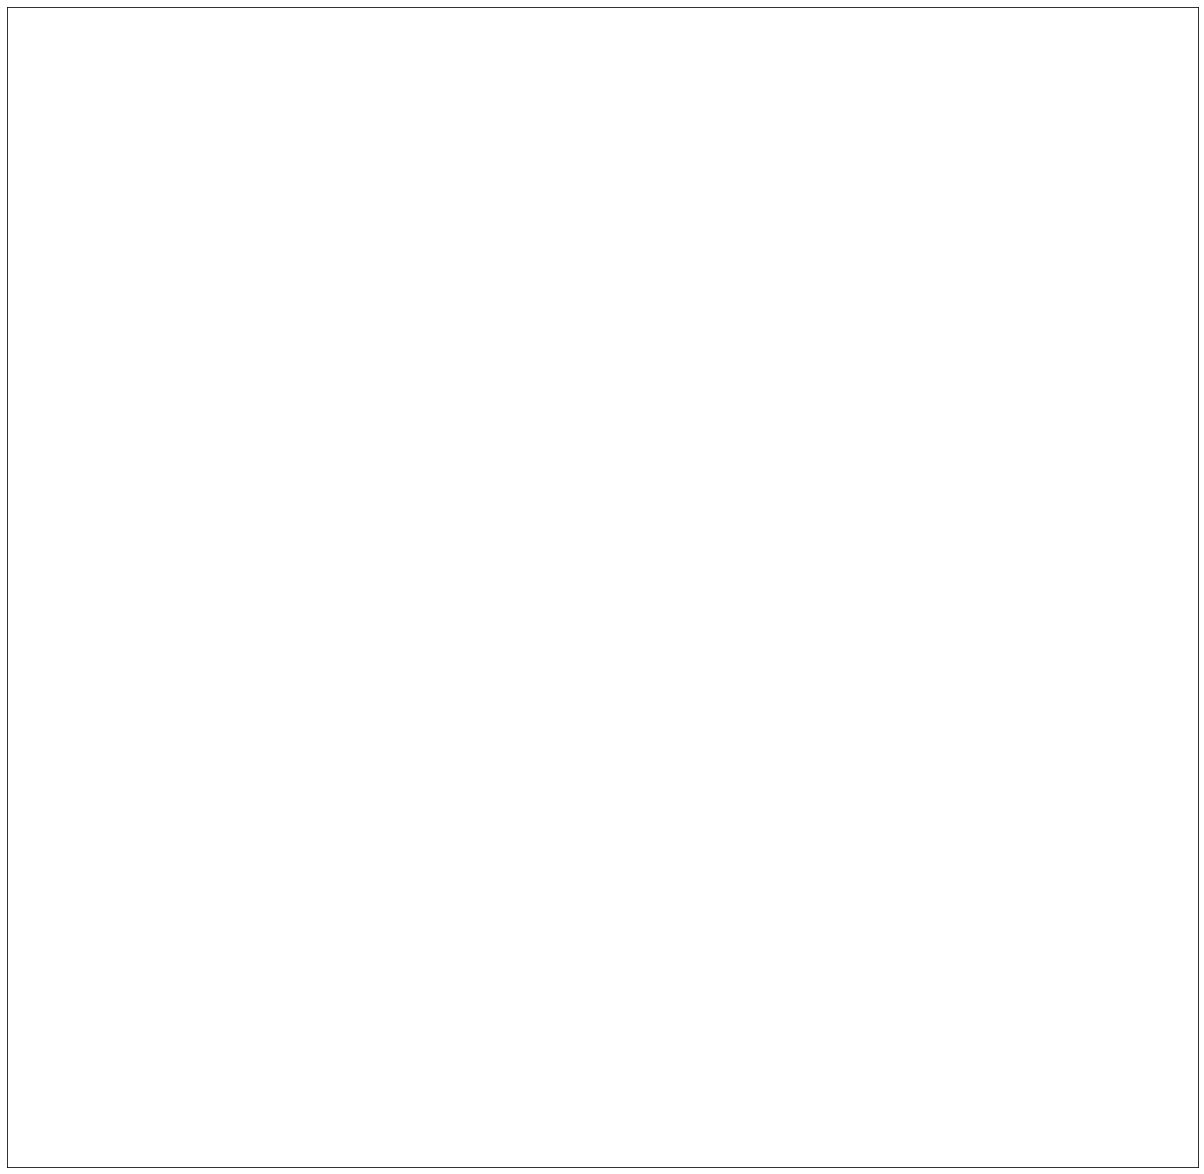

In [132]:
dpi = matplotlib.rcParams['figure.dpi']
img = img.transpose(0, 1).transpose(1, 2)
height, width, depth = img.shape
figsize = width / float(dpi), height / float(dpi)

fig, ax = plt.subplots(1, 1, figsize=figsize)

ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
ax.imshow(img, aspect="auto")

plt.show()

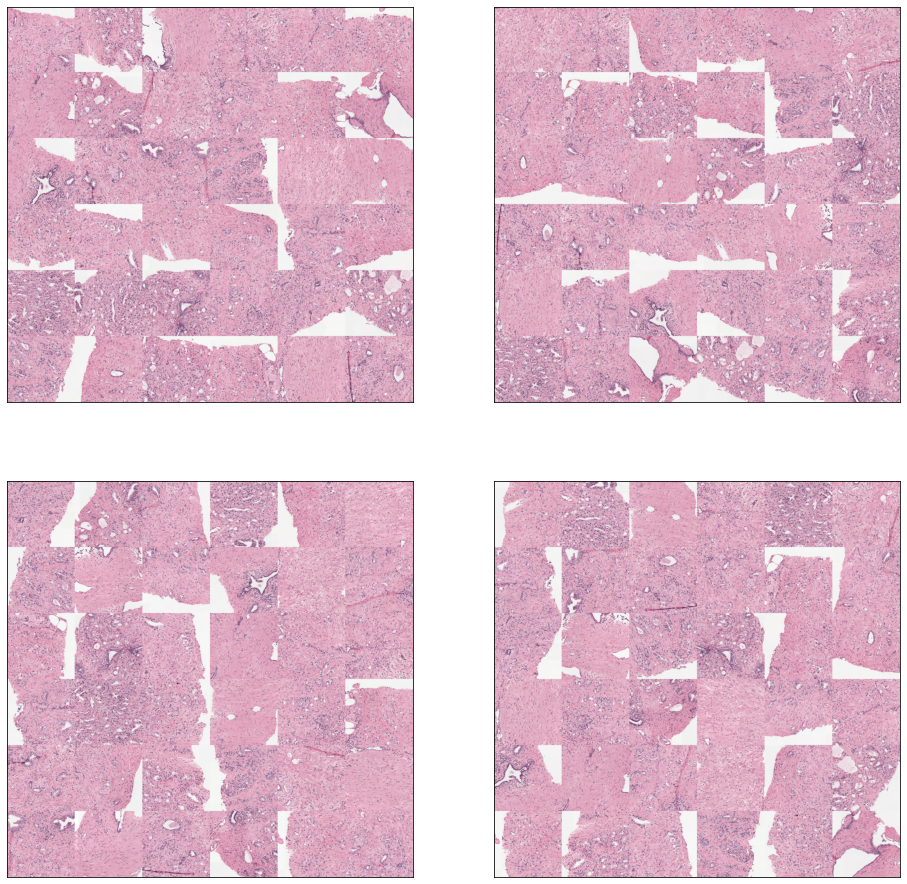

In [ ]:
n_examples = 4
grid_size = math.ceil(n_examples**0.5)

fig, axs = plt.subplots(grid_size, grid_size, figsize=(16, 16))
axs = axs.flatten()

for ax in axs:
    ax.axis("off")

for ax in axs:
    img, label, slide_id = dataset_show[random_slide_idx]
    ax.axis("on")
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.imshow(img.transpose(0, 1).transpose(1, 2), aspect="auto")
plt.show()
